In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy import stats

In [6]:
sales = pd.read_csv('shop_sales.csv')

In [8]:
sales

,item_id,store_id,date_id,cnt
0,STORE_2_085,STORE_2,1,3
1,STORE_2_085,STORE_2,2,8
2,STORE_2_085,STORE_2,3,0
3,STORE_2_085,STORE_2,4,3
4,STORE_2_085,STORE_2,5,0
...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4


In [9]:
# 3 магазина - нужно выбрать 1 из 3
stores = list(sales.store_id.unique())
print(stores)

['STORE_2', 'STORE_3', 'STORE_1']


## Выбираю STORE_1

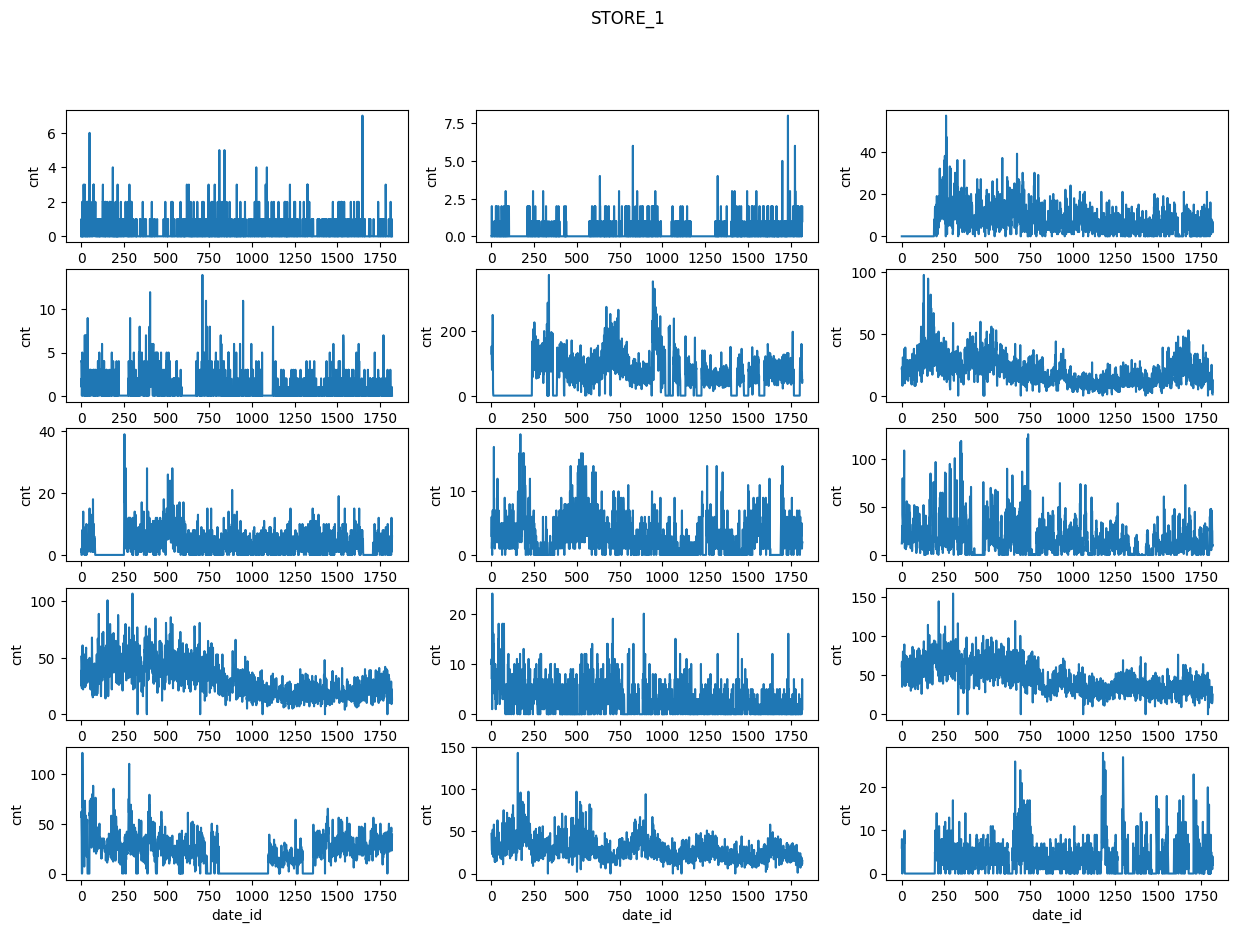

In [11]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(sales[sales.store_id=='STORE_1'].item_id.unique()):
    sns.lineplot(data = sales[(sales.item_id==art) & (sales.store_id=='STORE_1')],
                 x='date_id',y='cnt',ax = ax[i//3][i%3])
plt.suptitle("STORE_1");

In [14]:
#данные о датах и праздниках (соединяется с продажами по полю date_id)
calendar = pd.read_csv('shop_sales_dates.csv')

In [16]:
calendar.head(4)

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,0,1,1


In [35]:
calendar['CASHBACK_STORE_3'].value_counts()

CASHBACK_STORE_3
0    1219
1     600
Name: count, dtype: int64

In [36]:
#данные о датах и праздниках (соединяется с датами по полю wm_yr_wk)
prices = pd.read_csv('shop_sales_prices.csv')

In [37]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,STORE_2,STORE_2_085,11101,1.00
1,STORE_2,STORE_2_043,11101,2.88
2,STORE_2,STORE_2_054,11101,2.28
3,STORE_2,STORE_2_090,11101,1.25
4,STORE_2,STORE_2_252,11101,1.48
...,...,...,...,...
11136,STORE_1,STORE_1_584,11551,1.00
11137,STORE_1,STORE_1_586,11551,1.68
11138,STORE_1,STORE_1_587,11551,2.48
11139,STORE_1,STORE_1_714,11551,1.58


In [39]:
prices['sell_price'].max()

6.71

In [40]:
sales

,item_id,store_id,date_id,cnt
0,STORE_2_085,STORE_2,1,3
1,STORE_2_085,STORE_2,2,8
2,STORE_2_085,STORE_2,3,0
3,STORE_2_085,STORE_2,4,3
4,STORE_2_085,STORE_2,5,0
...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2
81851,STORE_1_727,STORE_1,1816,3
81852,STORE_1_727,STORE_1,1817,1
81853,STORE_1_727,STORE_1,1818,4


In [49]:
customer1 = sales[(sales['store_id'] == 'STORE_1') & (customer1['item_id'] == 'STORE_1_064')]
store_1_064 = pd.merge(customer1, calendar, on='date_id', how='inner')
store_1_064.head(5)

,item_id,store_id,date_id,cnt,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,STORE_1_064,STORE_1,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,STORE_1_064,STORE_1,2,1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,STORE_1_064,STORE_1,3,0,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,STORE_1_064,STORE_1,4,0,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
4,STORE_1_064,STORE_1,5,0,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


In [51]:
store_1_064 = store_1_064.drop(columns = ['item_id', 'store_id', 'date_id',  ])

In [54]:
store_1_064['date'] = pd.to_datetime(store_1_064['date'])
store_1_064.set_index("date",inplace=True)
store_1_064.head(5)

,cnt,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
date,,,,,,,,,,,,,
2011-01-29,0,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,1,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,0,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,0,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
2011-02-02,0,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


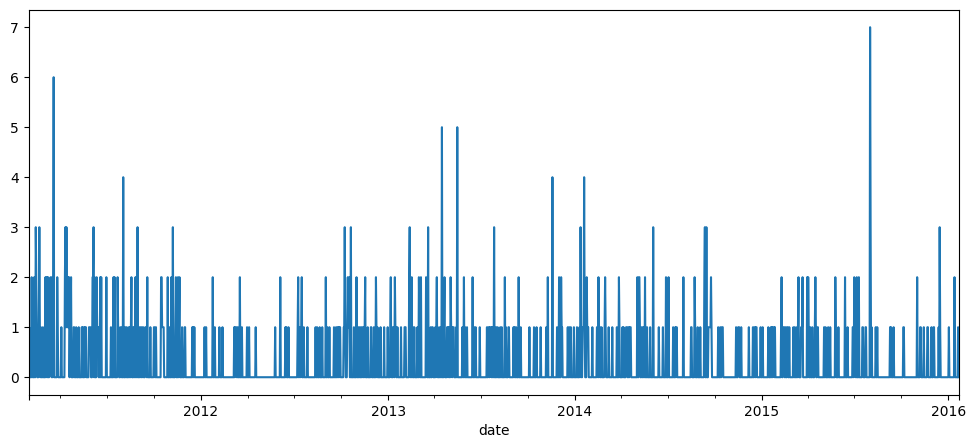

In [55]:
store_1_064['cnt'].plot(figsize=(12,5));

In [58]:
import statsmodels.api as sm

# Предполагаем, что store_1_064['cnt'] уже определен как Series или DataFrame
test = sm.tsa.adfuller(store_1_064['cnt'])

print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])

if test[0] > test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')


adf:  -12.041152488931608
p-value:  2.730292178314811e-22
Critical values:  {'1%': -3.433966009459769, '5%': -2.8631372667825503, '10%': -2.567620331903232}
единичных корней нет, ряд стационарен


In [64]:
from statsmodels. tsa.stattools import adfuller, kpss

In [65]:
adfuller(store_1_064['cnt'])

(-12.041152488931608,
 2.730292178314811e-22,
 7,
 1811,
 {'1%': -3.433966009459769,
  '5%': -2.8631372667825503,
  '10%': -2.567620331903232},
 3657.193325533198)

In [66]:
river_zero = store_1_064['cnt']

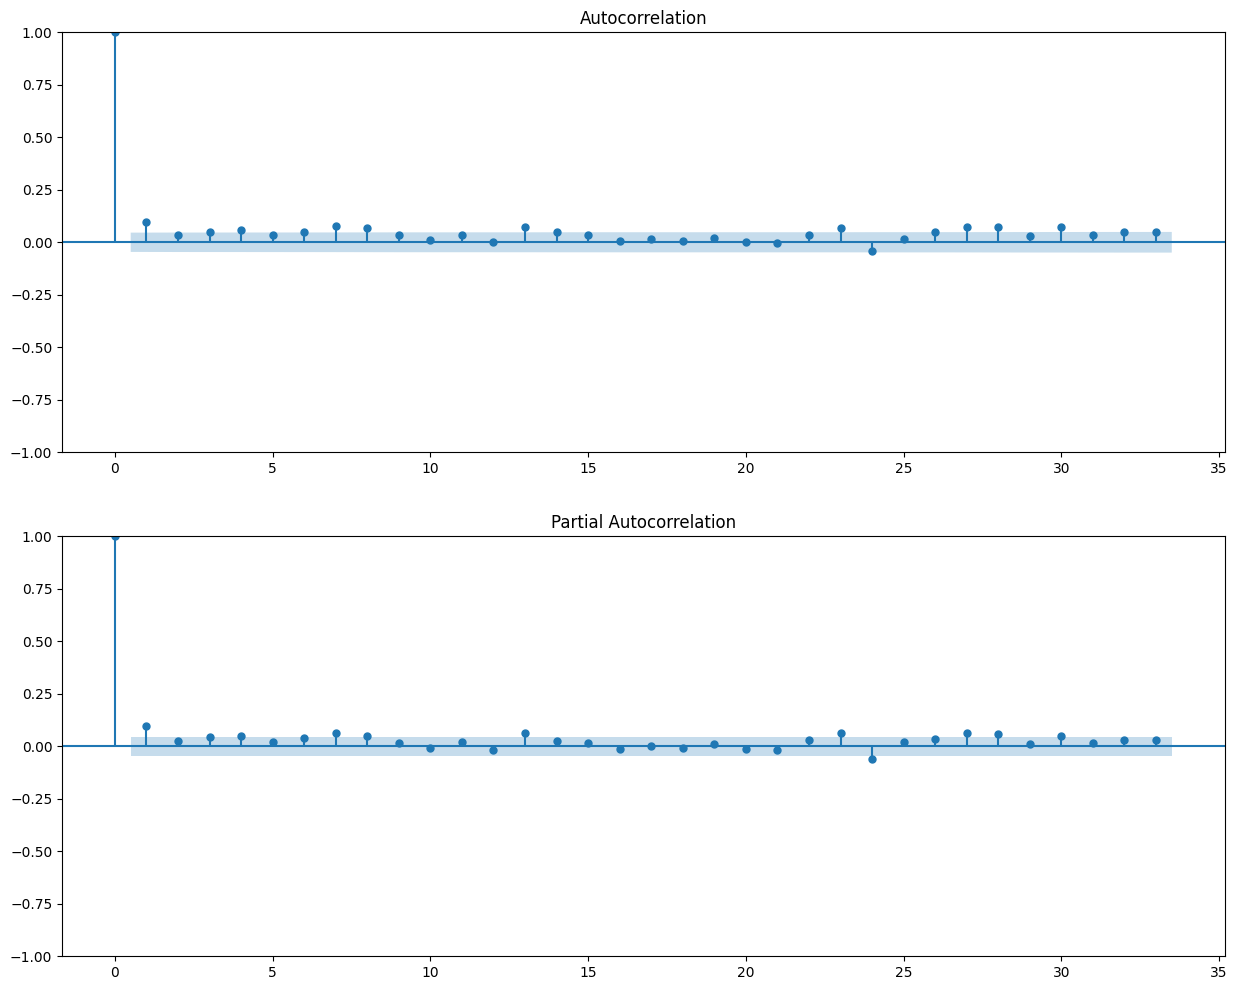

In [67]:
# подберем максимальные значения для p и q
fig,ax =plt.subplots(2,1,figsize= (15,12)) 
tsaplots.plot_acf(river_zero,ax=ax[0]);
tsaplots.plot_pacf(river_zero,ax=ax[1]);

In [75]:
from itertools import product
from sktime.forecasting.arima import ARIMA


In [76]:
def calc_optimum_arma(ts,
                      max_p,
                       max_q): 
    """
    Подбор оптимальных гиперпараметров модели ARMA с помощью критерия Акаике.
    Идет перебор всех вариантов (p,q) в пределах (0,max_p)*(0,max_q)
    
    """
    
    best_bic = float("inf")
    
    ps = range(0, max_p+1)
    qs = range(0, max_q+1)
    parameters = product(ps, qs)
    parameters_list = list(parameters)
    
    print(len(parameters_list))
    
    results = []
    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        try:
            model=ARIMA(order=(param[0], 0, param[1])).fit(ts)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters:', param)
            continue
        aic = model._forecaster.aic()
        bic = model._forecaster.bic()
        #сохраняем лучшую модель, aic, параметры
        if bic < best_bic:
            best_model = model
            best_bic = aic
            best_param = param
        results.append([param, aic, bic]) 
    
    return results, best_model

In [78]:
# если мы, вопреки здравому смыслу, попробуем подобрать модель arma, скажем, вплоть до 4го порядка
params, arima = calc_optimum_arma(river_zero,4,4)

25


/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/muzafarov/anaconda3/envs/timeseries/lib/python3.9/site-packag

In [79]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1819
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1860.838
Date:                Thu, 30 May 2024   AIC                           3729.676
Time:                        16:08:43   BIC                           3751.700
Sample:                    01-29-2011   HQIC                          3737.802
                         - 01-21-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0051      0.003      1.630      0.103      -0.001       0.011
ar.L1          0.9850      0.008    116.594      0.000       0.968       1.002
ma.L1         -0.9604      0.014    -68.715      0.000      -0.988      -0.933
sigma2         0.4530      0.008     56.376      0.000       0.437       0.469
===================================================================================
Ljung-Box (L1) (Q):                   4.92   Jarque-Bera (JB):             14581.66
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             2.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Отделяемся

In [80]:
import pandas as pd

# Загрузка данных
sales_data = pd.read_csv('shop_sales.csv')
holidays_data = pd.read_csv('shop_sales_dates.csv')
prices_data = pd.read_csv('shop_sales_prices.csv')

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

class SalesPredictor:
    def __init__(self):
        self.model = None

    def preprocess_data(self, sales_data, holidays_data, prices_data):
        # Преобразование дат в формате datetime
        sales_data['date'] = pd.to_datetime(sales_data['date'])
        holidays_data['date'] = pd.to_datetime(holidays_data['date'])
        prices_data['date'] = pd.to_datetime(prices_data['date'])

        # Объединяем данные в одну таблицу
        data = pd.merge(sales_data, prices_data, on=['date', 'product_id'], how='left')
        data = pd.merge(data, holidays_data, on='date', how='left')
        data['is_holiday'] = data['holiday_name'].notnull().astype(int)
        data.drop(columns=['holiday_name'], inplace=True)

        # Упорядочение данных
        data.sort_values(by=['date', 'product_id'], inplace=True)
        return data

    def train(self, data, product_id, target='sales', test_size=0.2):
        # Предобработка данных для конкретного продукта
        product_data = data[data['product_id'] == product_id].copy()
        product_data.set_index('date', inplace=True)
        product_data = product_data.asfreq('D').fillna(0)  # Заполняем пропуски нулями
        
        # Разделение на тренировочные и тестовые данные
        train, test = train_test_split(product_data, test_size=test_size, shuffle=False)
        
        # Обучение модели
        self.model = ExponentialSmoothing(train[target], seasonal='add', seasonal_periods=7).fit()
        
        # Оценка качества на тестовых данных
        predictions = self.model.forecast(len(test))
        rmse = mean_squared_error(test[target], predictions, squared=False)
        print(f'RMSE for product {product_id}: {rmse}')

    def save_model(self, filename):
        if self.model:
            joblib.dump(self.model, filename)
        else:
            print("No model to save.")

    def load_model(self, filename):
        if os.path.exists(filename):
            self.model = joblib.load(filename)
        else:
            print("Model file not found.")

    def predict(self, periods, frequency='D'):
        if self.model:
            future = self.model.forecast(periods)
            future_index = pd.date_range(start=self.model.data.endog.index[-1], periods=periods + 1, freq=frequency)[1:]
            return pd.Series(future, index=future_index)
        else:
            print("No model found.")
            return None

# Загрузка данных
# sales_data = pd.read_csv('/mnt/data/shop_sales.csv')
# holidays_data = pd.read_csv('/mnt/data/shop_sales_dates.csv')
# prices_data = pd.read_csv('/mnt/data/shop_sales_prices.csv')

# Пример использования
# predictor = SalesPredictor()
# processed_data = predictor.preprocess_data(sales_data, holidays_data, prices_data)
# predictor.train(processed_data, product_id=1)  # Тренируем для первого продукта
# predictor.save_model('model_product_1.pkl')

# predictor.load_model('model_product_1.pkl')
# forecast = predictor.predict(periods=30)  # Прогноз на 30 дней
# print(forecast)


In [83]:
# Загрузка данных
sales_data = pd.read_csv('shop_sales.csv')
holidays_data = pd.read_csv('shop_sales_dates.csv')
prices_data = pd.read_csv('shop_sales_prices.csv')

# Пример использования
predictor = SalesPredictor()
processed_data = predictor.preprocess_data(sales_data, holidays_data, prices_data)
predictor.train(processed_data, product_id=1)  # Тренируем для первого продукта
predictor.save_model('model_product_1.pkl')

predictor.load_model('model_product_1.pkl')
forecast = predictor.predict(periods=30)  # Прогноз на 30 дней
print(forecast)

KeyError: 'date'